The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

1.13.1. Removing features with low variance
#VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by the following 

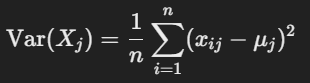

for 1, 5, 80, 110

μ = 49
- 1 - 49 = -48  -> (-48)^2 = 2304
- 5 - 49 = -44  -> (-44)^2 = 1936
- 80 - 49 = 31  -> (31)^2 = 961
- 110 - 49 = 61 -> (61)^2 = 3721

- 1/4 * sum(2304 + 1936 + 961 + 3721)
- 1/4 * 8922 = 2230.5

In [1]:
import numpy as np

def var_of_array(X):
    numpy_X = np.array(X)

    for col in range(numpy_X.shape[1]):
        print(f'col {col}: {numpy_X[:,col]}')
        print(f'variance of col {col} = {np.var(numpy_X[:,col])}\n')

In [2]:
from sklearn.feature_selection import VarianceThreshold

X = [[1,  1,   30],
     [1,  5,    6],
     [7,  80,  90],
     [2,  110, 12]]

print(f'X: {X}\n\n')

VarianceThreshold = VarianceThreshold(threshold=11).fit_transform(X)
print(f'VarianceThreshold\n{VarianceThreshold}\n\n')

var_of_array(X)

X: [[1, 1, 30], [1, 5, 6], [7, 80, 90], [2, 110, 12]]


VarianceThreshold
[[  1  30]
 [  5   6]
 [ 80  90]
 [110  12]]


col 0: [1 1 7 2]
variance of col 0 = 6.1875

col 1: [  1   5  80 110]
variance of col 1 = 2230.5

col 2: [30  6 90 12]
variance of col 2 = 1104.75



In [3]:
from sklearn.feature_selection import VarianceThreshold
x = [[7,1,1],
     [3,1,2],
     [0,2,1],
     [10,2,3]
    ]

vr = VarianceThreshold(threshold=0.9).fit_transform(x)
print(vr, '\n\n')

var_of_array(x)


[[ 7]
 [ 3]
 [ 0]
 [10]] 


col 0: [ 7  3  0 10]
variance of col 0 = 14.5

col 1: [1 1 2 2]
variance of col 1 = 0.25

col 2: [1 2 1 3]
variance of col 2 = 0.6875



* Univariate feature selection
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

* SelectKBest: removes all but the  highest scoring features

* SelectPercentile: removes all but a user-specified highest scoring percentage of features

* using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

* GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

Iris Dataset: A dataset that contains information about 150 samples of iris flowers

4 features for each sample:
- Sepal length
- Sepal width
- Petal length
- Petal width

3 target classes (i.e., species of iris flowers):
- Setosa
- Versicolor
- Virginica

SelectKBest is a feature selection method that selects the top k features based on a scoring function. Here, k=2, so it will select the 2 best features.

the Chi-Squared test used to score the features. The test assesses whether there is a significant association between each feature and the target label (species). It is useful for non-negative, categorical data, but in this case, we apply it to continuous data by treating the numerical features as if they were categorical.

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y= iris.target

# or use the following line
# x, y = load_iris(return_X_y=True)

print(f'x\n{x}\n\n')
print(f'y\n{y}\n\n')

from sklearn.feature_selection import chi2, SelectKBest
w = SelectKBest(chi2, k=2).fit_transform(x, y)
print(f'w\n{w}')

x
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 

In [5]:
from sklearn.datasets import load_iris

print(f'load_iris().keys(): {load_iris().keys()}')

x, y= load_iris(return_X_y=True)
print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

from sklearn.feature_selection import chi2, SelectKBest

u = SelectKBest(chi2, k=2)
u = u.fit_transform(x,y)
print(f'u.shape: {u.shape}')

load_iris().keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
x.shape: (150, 4)
y.shape: (150,)
u.shape: (150, 2)


In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2, SelectKBest

X, y = load_iris(return_X_y=True)
SelectKBest(chi2, k=2)

SelectKBest(k=2, score_func=<function chi2 at 0x000001FCBD6E42C0>)

In [7]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(f'X_new.shape: {X_new.shape}')

X_new.shape: (150, 2)


# Recursive feature elimination
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

# pearson correlation coefficient python

In [8]:
import numpy as np

x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])

rho = np.corrcoef(x_simple, y_simple)
print(rho)

[[ 1.  -0.7]
 [-0.7  1. ]]


In [9]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([5,10,2,5,4])
cr = np.corrcoef(x, y)
print(cr)

[[ 1.         -0.37523939]
 [-0.37523939  1.        ]]


The Pearson correlation coefficient (r) is a measure of the linear relationship between two variables 𝑋 and 𝑌

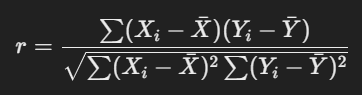
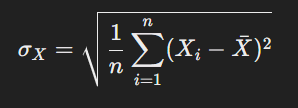
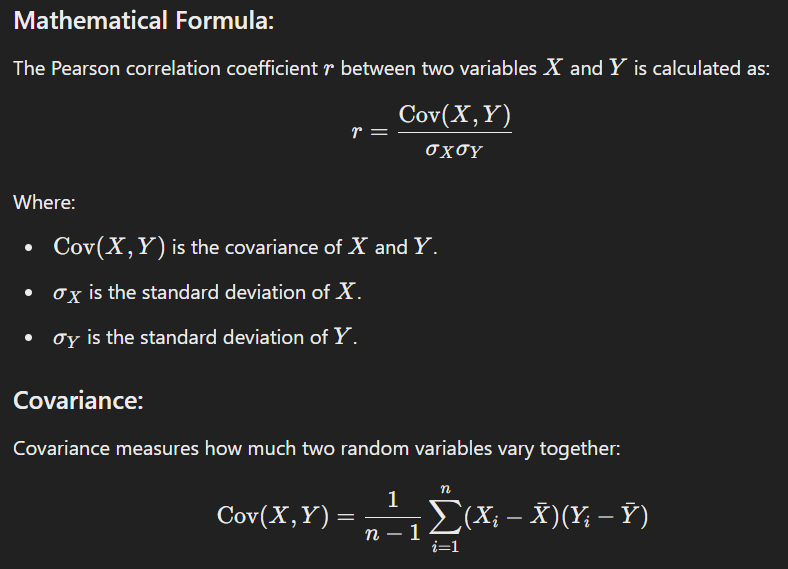

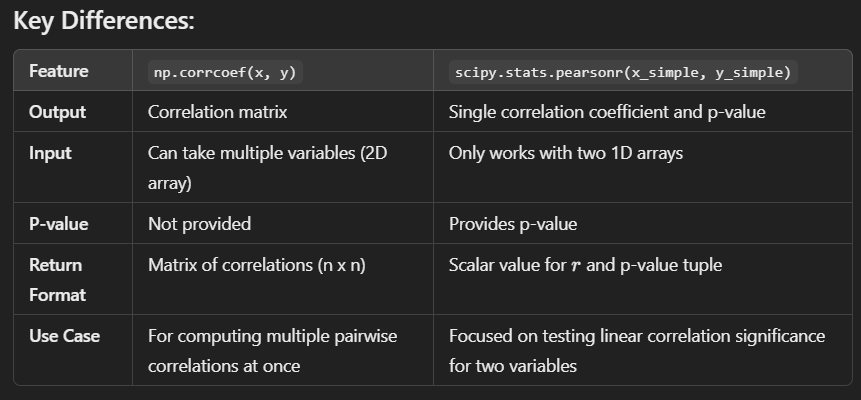

In [10]:
import scipy

print(scipy.stats.pearsonr(x_simple, y_simple))

PearsonRResult(statistic=-0.7000000000000001, pvalue=0.1881204043741872)


p_value tells you whether the observed data is consistent with the null hypothesis

In [11]:
import scipy.stats as ss

# p-value: The significance value of the correlation,
# but in this case, it’s discarded (using _)
# as the focus is on the correlation coefficient.
corr, _ = ss.pearsonr(x_simple, y_simple)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.700


# Covariance

Covariance is a measure of the joint variability of two random variables. It indicates how two variables change together: whether they tend to increase or decrease together (positive covariance) or if one increases while the other decreases (negative covariance). Covariance helps to understand the direction of the linear relationship between the two variables.

In [12]:
from numpy import cov
covariance = cov(x_simple, y_simple)
print(covariance)

[[ 2.5  -1.75]
 [-1.75  2.5 ]]


# Pearson’s Chi-Square Test

The chi2_contingency function calculates:

- stat: the test statistic.
- p: the p-value, which indicates the probability of observing the data (or something more extreme) assuming the null hypothesis is true.
- dof: degrees of freedom, which is calculated as (𝑟𝑜𝑤𝑠−1)×(𝑐𝑜𝑙𝑢𝑚𝑛𝑠−1).
- expected: the expected frequencies if the null hypothesis holds true.

Hypotheses:

- H0 (Null Hypothesis): There is no relationship between the two categorical variables (the variables are independent).
- H1 (Alternative Hypothesis): There is a relationship between the two categorical variables (the variables are dependent).

In [13]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241],
        [234, 242, 232]]

stat, p, dof, expected = chi2_contingency(data)
# h0 no relation
# H1 Relation
# interpret p-value

alpha = 0.05
print(f'p value is {p}')

if p <= alpha:
    print('Independent (reject H0)')
else:
    print('Dependent (H0 holds true)')

p value is 0.10319714047309392
Dependent (H0 holds true)


In [14]:
from scipy.stats import chi2_contingency

data = [[10, 20, 30], 
        [10, 2, 40]]

chi2_contingency_output = chi2_contingency(data)

alpha = 0.05
print(f'p value is {chi2_contingency_output[1]}')

if p <= alpha:
    print('Independent (reject H0)')
else:
    print('Dependent (H0 holds true)')

p value is 0.00039676442862755936
Dependent (H0 holds true)


 # K-Fold cross-validation
 its approach helps evaluate the model’s performance by ensuring that each sample in the dataset is used for both training and testing, providing a more robust assessment of the model’s ability to generalize to unseen data

In [15]:
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]

kf = KFold(n_splits=4)

train_X = []
test_X = []

for train, test in kf.split(X):
    print("%s %s" % (train, test))
    train_X.append(train)
    test_X.append(test)

print(f'train_X: {train_X}')
print(f'test_X: {test_X}')

print(f'len(train_X): {len(train_X)}')
print(f'len(test_X): {len(test_X)}')


# it doesn't return a direct tuple of train and test sets.
# train_X, test_X = kf.split(X)

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
train_X: [array([1, 2, 3]), array([0, 2, 3]), array([0, 1, 3]), array([0, 1, 2])]
test_X: [array([0]), array([1]), array([2]), array([3])]
len(train_X): 4
len(test_X): 4
